In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# preliminary data inspection

In [25]:
df=pd.read_csv("A:/data science/python/data/health care project/data.csv")
print(df.shape)
print(df.isnull().sum())

(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [26]:
# It does not contain any puplicates as well as any null values
df.drop_duplicates().shape

(302, 14)

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


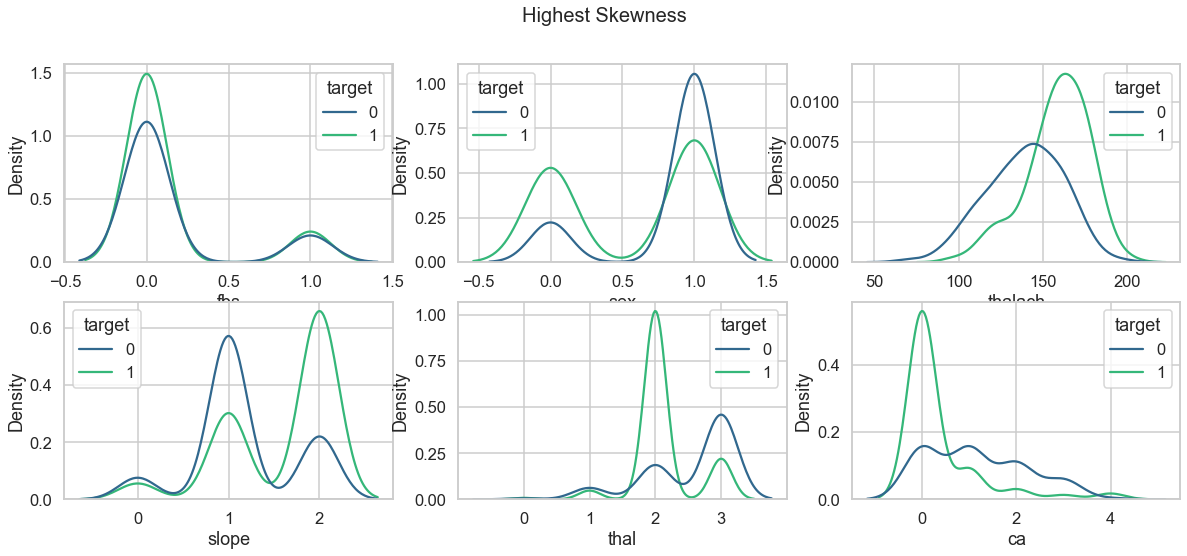

In [28]:
'''To Identify the data variables which might be categorical in nature.
and to Describe and explore these variables using appropriate tools'''


fig, axes = plt.subplots(2,3, figsize=(20, 8));
fig.suptitle('Highest Skewness', fontsize=20);

sns.kdeplot(df['fbs'], ax=axes[0,0],hue=df['target'],palette='viridis');
sns.kdeplot(df['sex'], ax=axes[0,1],hue=df['target'],palette='viridis');
sns.kdeplot(df['thalach'], ax=axes[0,2],hue=df['target'],palette='viridis');
sns.kdeplot(df['slope'], ax=axes[1,0],hue=df['target'],palette='viridis');
sns.kdeplot(df['thal'], ax=axes[1,1],hue=df['target'],palette='viridis');
sns.kdeplot(df['ca'], ax=axes[1,2],hue=df['target'],palette='viridis');

In [29]:
df['heart attack'] = df['target'].apply(lambda x: 'more chance' if x==1 else 'less chance')

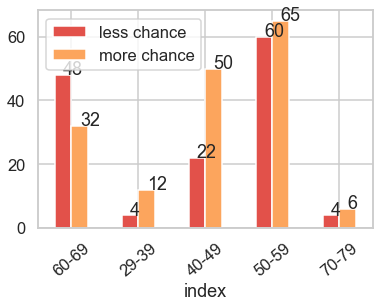

In [30]:
#To study the occurrence of CVD across different ages.

df['age_category'] = pd.cut(df['age'], bins=[0,39,49,59,69,77],labels=["29-39","40-49","50-59","60-69","70-79"]).to_frame()

temp = pd.DataFrame()
for age in df['age_category'].unique().tolist():
    temp[age] = df[df['age_category']==age]['heart attack'].value_counts()

temp=temp.T.reset_index()

fig, ax = plt.subplots()
temp.plot.bar(x = 'index', y = ['less chance', 'more chance'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))



The above plot shows the occurrence of CVD across different ages and it seems like CVD occurs more to people who are at the age caregory of 50-59

In [31]:
def to_obj(data):
    temp =[]
    for i in data:
        if i<90:
            temp.append("Low_bp")
        elif i>140:
            temp.append("High_bp")
        else:
            temp.append("Normal_bp")
        
    return temp
        


In [32]:
def to_obj2(data):
    temp =[]
    for i in data:
        if i<200:
            temp.append("good_Chol")
        elif i>240:
            temp.append("High_Chol")
        else:
            temp.append("Normal_Chol")
        
    return temp
        


In [33]:
def to_obj3(data):
    temp =[]
    for i in data:
        if i==0:
            temp.append("low")
        elif i==1:
            temp.append("medium")
        else:
            temp.append("high")
        
    return temp

In [34]:
def to_obj4(data):
    temp =[]
    for i in data:
        if i==2:
            temp.append("normal")
        elif i==1:
            temp.append("fixed defect")
        elif i==3:
            temp.append("reversable defect")
        else:
            temp.append("no defect")
    return temp

            target
age      -0.225439
sex      -0.280937
cp        0.433798
trestbps -0.144931
chol     -0.085239
fbs      -0.028046
restecg   0.137230
thalach   0.421741
exang    -0.436757
oldpeak  -0.430696
slope     0.345877
ca       -0.391724
thal     -0.344029
target    1.000000


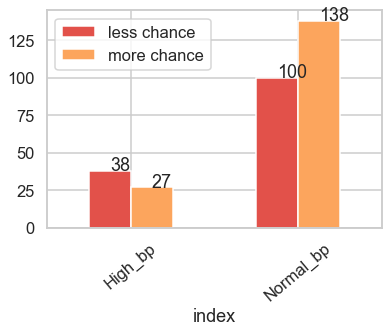

In [35]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?

df["Blood_pressure"]=to_obj(df["trestbps"])
corr = df.corr()['target'].to_frame()
corr.sort_values(by='target',ascending=False)
print(corr)

temp = pd.DataFrame()
for bp in df['Blood_pressure'].unique().tolist():
    temp[bp] = df[df['Blood_pressure']==bp]["heart attack"].value_counts()
temp=temp.T.reset_index()


fig, ax = plt.subplots()
temp.plot.bar(x = 'index', y = ['less chance', 'more chance'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

No,it is not possible to detect heart attack based on anomalies in resting blood pressure of the patient as this variable has a low correlation with the target variable

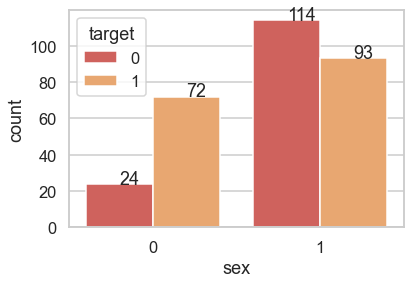

In [36]:
#Study the composition of overall patients w.r.t . gender.

fig, ax = plt.subplots()
sns.countplot(x="sex", hue="target", data=df,ax=ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

From the above bar chart it is clear that most of the males are affected by the CVD

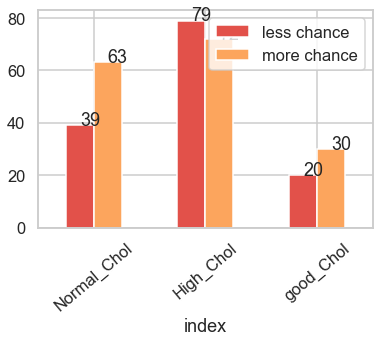

In [37]:
#Describe the relationship between cholesterol levels and our target variable.
df["Chol_con"]=to_obj2(df["chol"])

temp1 = pd.DataFrame()
for bp in df['Chol_con'].unique().tolist():
    temp1[bp] = df[df['Chol_con']==bp]["heart attack"].value_counts()
temp1=temp1.T.reset_index()
temp1


fig, ax = plt.subplots()
temp1.plot.bar(x = 'index', y = ['less chance', 'more chance'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))


The above bar graph shows that ,higher the Cholesterol level higher the occurance of CVD

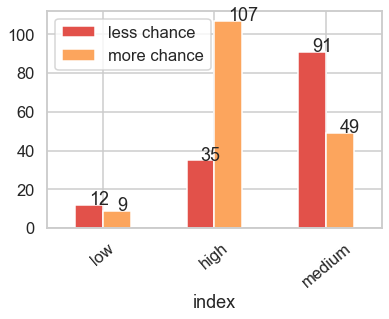

In [38]:
#What can be concluded about the relationship between peak exercising and occurrence of heart attack?
df["Slope1"]=to_obj3(df["slope"])

temp2 = pd.DataFrame()
for ex in df['Slope1'].unique().tolist():
    temp2[ex] = df[df['Slope1']==ex]["heart attack"].value_counts()
temp2=temp2.T.reset_index()

fig, ax = plt.subplots()
temp2.plot.bar(x = 'index', y = ['less chance', 'more chance'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))


From the above bar grap it is concluded that ,higher the exercising higher the occurance of CVD

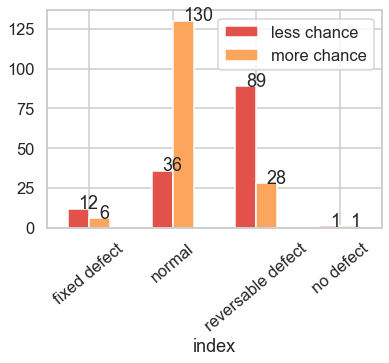

In [39]:
#Is thalassemia a major cause of CVD? 
#How are the other factors determining the occurrence of CVD?

df["thalassemia"]=to_obj4(df["thal"])

temp3 = pd.DataFrame()
for thal in df['thalassemia'].unique().tolist():
    temp3[thal] = df[df['thalassemia']==thal]["heart attack"].value_counts()
temp3=temp3.T.reset_index()
temp3


fig, ax = plt.subplots()
temp3.plot.bar(x = 'index', y = ['less chance', 'more chance'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))


yes,Thalassemia is a major cause of CVD as it is clear from the above plot that people who are not affected by Thalassemia have less possiblity of CVD and people who are affected by the Thalassemia have more possiblities

In [40]:
corr = df.corr()['target'].to_frame()
corr.sort_values(by='target',ascending=False)
corr

,target
age,-0.225439
sex,-0.280937
cp,0.433798
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalach,0.421741
exang,-0.436757
oldpeak,-0.430696


The factores determining the occurance of CVD are cp,thalach,exang,oldpeak,thal,slope
as they have high correlation with the target variable 

<Figure size 432x288 with 0 Axes>

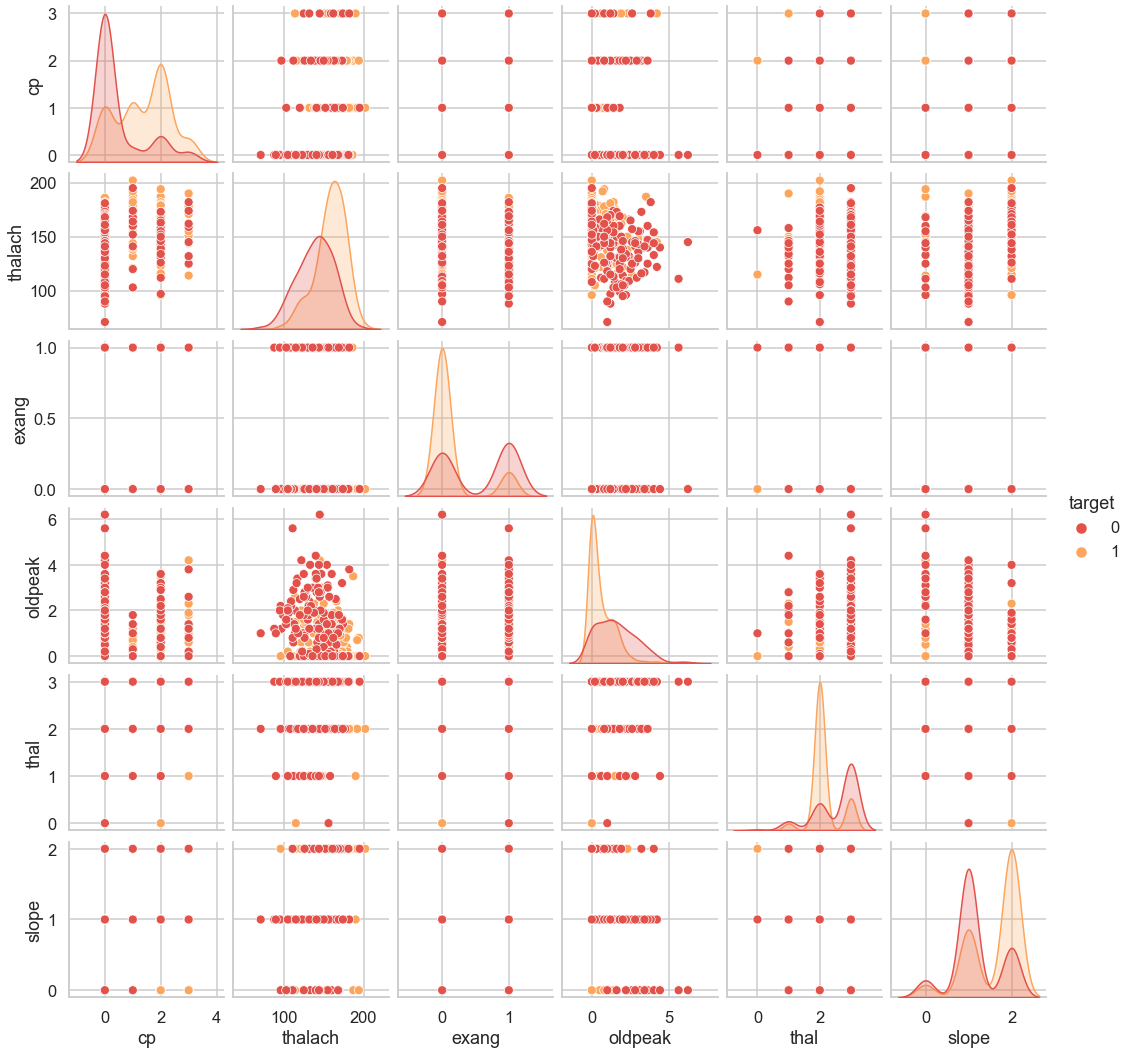

In [41]:
#Use a pair plot to understand the relationship between all the given variables.

plt.figure();
sns.set(style='whitegrid', context='talk', palette='Spectral');
sns.pairplot(data=df[['cp','thalach','exang','oldpeak','thal','slope','target']],
             hue='target');

# To Perform logistic regression,  and to predict the outcome for test data, and validate the results by using the confusion matrix.

In [42]:
df1 = df.filter(['cp','thalach','exang','oldpeak','thal','slope','target'])

In [43]:
x=df1.drop('target',axis=1)
y=df1['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [44]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

svclassifier=SVC(kernel="rbf",random_state=0)
svclassifier.fit(x_train,y_train)    

SVC(random_state=0)

In [45]:
y_pred=svclassifier.predict(x_test)
print(y_pred)

[1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1]


In [46]:
cm=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(cm)

Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.96      0.74      0.83        34
           1       0.74      0.96      0.84        27

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61

[[25  9]
 [ 1 26]]
